Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [1]:
import tensorflow as tf

2025-01-09 15:53:50.223212: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Gradient**

Możliwe jest wyliczenie gradientu dowolnego wyrażenia różniczkowalnego. Wykorzystujemy do tego metodę **tf.GradientTape()**


Funkcja **jednej zmiennej**:

In [2]:
x = tf.Variable(4.0)

with tf.GradientTape() as tape:
    f = x**3                     #definicja funkcji f(x)=x^3
    df_dx = tape.gradient(f, x)  #gradient 'f' ze względu na zmienną 'x'

df_dx.numpy()

np.float32(48.0)

Funkcja **dwóch zmiennych**:

In [3]:
x = tf.Variable(4.0)
y = tf.Variable(3.0)

with tf.GradientTape() as tape:
    f = x**3+y**2                         #definicja funkcji f(x,y)=x^3+y^2
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x' i ze względu na zmienną 'y'

print(df_dx.numpy())
print(df_dy.numpy())

48.0
6.0


Przykład z **zadania 2**:

Definiujemy funkcję **f(x,y)**:

In [4]:
def f(x,y):
  return (2*(x**3))+(3*(y**2))+4

Obliczamy wartość **f(4,5)**:

In [5]:
x_0 = 4.0
y_0 = 5.0

f(x_0,y_0)

207.0

Liczymy **grad f(4,5)**:

In [6]:
x = tf.Variable(x_0)
y = tf.Variable(y_0)

with tf.GradientTape() as tape:
    f_ = f(x,y)
    df_dx,df_dy = tape.gradient(f_,(x,y))

df_dx = df_dx.numpy()
df_dy = df_dy.numpy()
df_dx,df_dy

(96.0, 30.0)

Przesuwamy się nieznacznie w kierunku przeciwnym do gradientu:

In [7]:
x_1 = x_0 - 0.001*df_dx
y_1 = y_0 - 0.001*df_dy
x_1,y_1

(3.904, 4.97)

Wartość funkcji w nowym punkcie jest mniejsza:

In [8]:
f(x_1,y_1)

197.10611452799998

Trochę skomplikujemy:

In [9]:
x = tf.Variable([3.0,2.0])

with tf.GradientTape() as tape:
    f = (x**3)                  #definicja funkcji f(x)=x^3
    df_dx = tape.gradient(f,x)  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)

tf.Tensor([27. 12.], shape=(2,), dtype=float32)


I jeszcze trochę skomplikujemy:

In [10]:
x = tf.Variable([3.0,2.0])
y = tf.Variable([1.0,0.0])

with tf.GradientTape() as tape:
    f = (x**3)+y**2                       #definicja funkcji f(x)=x^3+y^2
    df_dx,df_dy = tape.gradient(f,(x,y))  #gradient 'f' ze względu na zmienną 'x'

print(df_dx)
print(df_dy)

tf.Tensor([27. 12.], shape=(2,), dtype=float32)
tf.Tensor([2. 0.], shape=(2,), dtype=float32)


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import pandas as pd
data = pd.read_csv('dane_1.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: 'dane_1.csv'

In [14]:
data_2 = np.array(data.iloc[:,1:])
data_2

array([[ 0.51198051,  0.90103037],
       [ 0.838831  ,  1.00529321],
       [ 0.06719464,  0.70346987],
       ...,
       [ 0.530616  ,  0.92223657],
       [-0.28121241,  0.83158298],
       [ 0.24521373,  0.95303463]])

In [15]:
real_x = data_2[:,0]
real_y = data_2[:,1]

In [16]:
real_x

array([ 5.11980511e-01,  8.38831005e-01,  6.71946410e-02,  5.28697202e-01,
       -8.24536004e-02,  2.06896625e-01,  7.59225078e-01,  2.42861518e-01,
        3.44011726e-01,  1.05326528e-01,  7.12043674e-01,  4.65813194e-01,
        2.70308693e-01, -2.54171866e-01, -1.29888287e-01,  5.48305439e-01,
       -9.37483928e-01, -2.82260573e-02,  7.42095613e-01, -8.14599333e-01,
        1.28451542e-01,  5.76975863e-01,  5.49819567e-01,  3.90861524e-01,
        1.52894914e-01,  6.82360582e-02,  9.44685254e-02,  8.13010272e-01,
       -2.85512645e-01,  2.93511194e-01, -1.11047894e-01, -4.20271593e-01,
       -2.95246008e-01,  3.69955883e-01,  1.01003525e+00, -4.49520435e-01,
        1.87925940e-01, -2.92452872e-01, -1.26210490e-01,  6.69451741e-02,
        2.61356994e-01, -1.42318718e+00, -4.25884485e-01,  9.58403746e-01,
       -9.68359862e-01,  1.61282256e-01, -4.50170659e-01, -2.91979852e-02,
        1.92259839e-01, -1.18820362e+00, -2.40188011e-01, -7.21494896e-01,
        2.55751482e-01, -

In [17]:
3* real_x + 6

array([ 7.53594153,  8.51649301,  6.20158392,  7.58609161,  5.7526392 ,
        6.62068987,  8.27767523,  6.72858455,  7.03203518,  6.31597959,
        8.13613102,  7.39743958,  6.81092608,  5.2374844 ,  5.61033514,
        7.64491632,  3.18754822,  5.91532183,  8.22628684,  3.556202  ,
        6.38535463,  7.73092759,  7.6494587 ,  7.17258457,  6.45868474,
        6.20470817,  6.28340558,  8.43903081,  5.14346207,  6.88053358,
        5.66685632,  4.73918522,  5.11426198,  7.10986765,  9.03010576,
        4.6514387 ,  6.56377782,  5.12264138,  5.62136853,  6.20083552,
        6.78407098,  1.73043847,  4.72234655,  8.87521124,  3.09492042,
        6.48384677,  4.64948802,  5.91240604,  6.57677952,  2.43538913,
        5.27943597,  3.83551531,  6.76725444,  4.2249051 ,  6.31302193,
        7.02294254,  6.41463621,  6.2318088 ,  3.90313228,  7.13009956,
        6.6544596 ,  7.24775951,  5.37718035,  5.17454883,  5.18010007,
        5.20139989,  4.95488837,  7.80173283,  4.81497121,  3.92

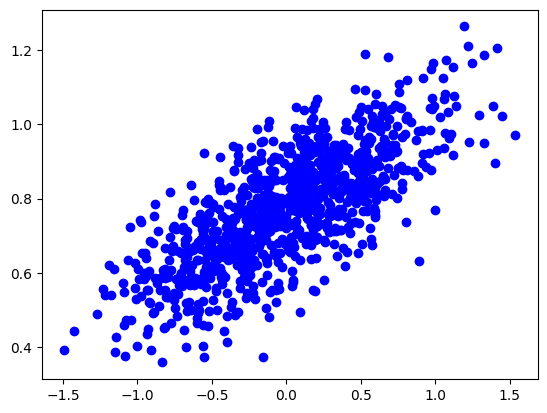

In [18]:
plt.scatter(real_x,real_y,c='b')
plt.show()

Definicja błędu:

In [19]:
x = tf.constant([1.0, 2.0, 3.0, 4.0])
tf.reduce_mean(x).numpy()

2.5

In [20]:
import random

In [21]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [22]:
Loss = []
epochs = 50
learning_rate = 0.2
mini_batch_size = 100

a = tf.Variable(random.random())
b = tf.Variable(random.random())

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    print(loss.numpy())
    Loss.append(loss.numpy())

    dloss_da, dloss_db = tape.gradient(loss,(a, b))

    a.assign_sub(learning_rate*dloss_da)  # a = a - learning_rate*dloss_da
    b.assign_sub(learning_rate*dloss_db)  # b = b - learning_rate*dloss_db

0.0858556
0.058517236
0.044484336
0.036078047
0.030366965
0.026162112
0.022928465
0.020387784
0.018371364
0.016763624
0.015479041
0.014451687
0.013629706
0.0129719125
0.01244547
0.012024131
0.011686906
0.011417
0.011200974
0.011028073
0.010889687
0.010778926
0.010690276
0.010619322
0.010562533
0.010517079
0.010480699
0.010451583
0.010428278
0.010409625
0.010394695
0.010382746
0.0103731835
0.010365528
0.010359403
0.010354498
0.010350575
0.010347433
0.010344918
0.010342906
0.010341295
0.010340007
0.010338975
0.010338149
0.010337488
0.010336959
0.010336535
0.010336197
0.010335926
0.010335709


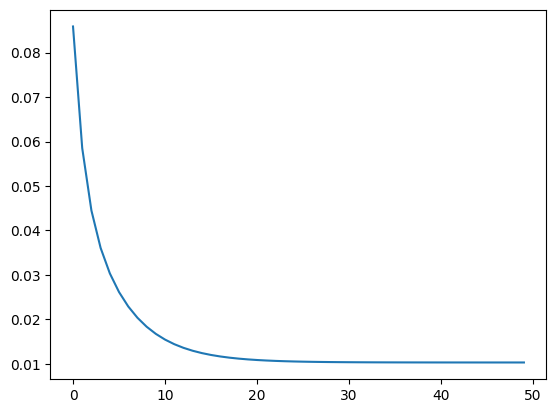

In [23]:
plt.plot(Loss)
plt.show()

In [24]:
print(a.numpy())
print(b.numpy())

0.22272348
0.77445996


In [25]:
max = np.max(real_x)
min = np.min(real_x)

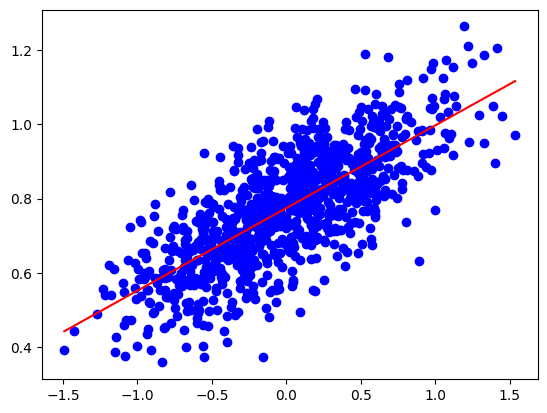

In [26]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(real_x,real_y,c="b")
plt.show()

**Mini-batch Stochastic Gradient Descent** - wykorzystujemy **część zbióru danych**

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.random.shuffle(arr)
arr

array([9, 3, 1, 5, 0, 7, 8, 4, 6, 2])

In [ ]:
def subset_dataset(x, y, mini_batch_size):
    arr = np.arange(len(x))
    np.random.shuffle(arr)
    x_mini_batch = x[arr[0:mini_batch_size]]
    y_mini_batch = y[arr[0:mini_batch_size]]
    return x_mini_batch,y_mini_batch

In [ ]:
x_batch,y_batch = subset_dataset(real_x,real_y,10)
x_batch

array([ 0.57421221,  0.10532653,  0.18194919,  0.52862184, -1.09893443,
        0.04423134, -0.52524404, -0.09952191,  0.29615595, -0.25076002])

In [ ]:
arr = np.arange(10)
np.random.shuffle(arr)
arr

array([2, 0, 5, 6, 1, 7, 9, 3, 8, 4])

Uzupełnij poniższą pętlę - dodaj odpowiednie wywołanie powyższej funkcji **subset_dataset**.

In [ ]:
import random

In [ ]:
Loss = []
epochs = 1000
learning_rate = 0.2
batch_size = 100

a = tf.Variable(random.random())
b = tf.Variable(random.random())

for i in range(epochs):

  #do zupełnienia

  with tf.GradientTape() as tape:

    #do uzupełnienia

    grad_a, grad_b = tape.gradient(loss,(a, b))

    a.assign_sub(learning_rate*grad_a)
    b.assign_sub(learning_rate*grad_b)

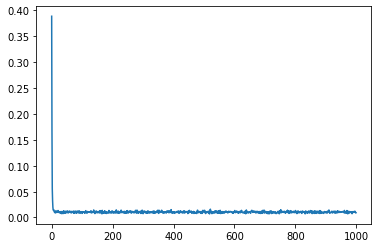

In [ ]:
plt.plot(Loss)
plt.show()

In [ ]:
print(a.numpy())
print(b.numpy())

0.22422135
0.7705469


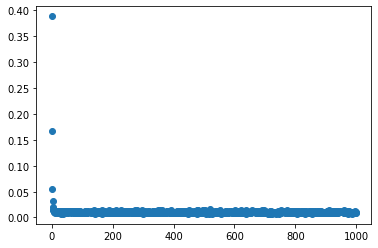

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

A teraz korzystamy z biblioteki Keras:

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Input

Definiujemy model:

In [41]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [42]:
model.add(Input(shape=(1,)))
model.add(Dense(units = 1, use_bias=True, activation = "linear"))

Definiujemy **optymalizator** i **błąd** (średni błąd kwadratowy - MSE). **Współczynnik uczenia = 0.1**

In [43]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [44]:
model.compile(loss='MSE',optimizer=opt)

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Proces **uczenia**:

In [46]:
epochs = 500
h = model.fit(real_x,real_y, verbose=0, epochs=epochs, batch_size=100)

In [47]:
Loss = h.history['loss']
Loss

[0.5555735230445862,
 0.4147666394710541,
 0.30017268657684326,
 0.21181832253932953,
 0.14536362886428833,
 0.09726376831531525,
 0.06418643146753311,
 0.04216717556118965,
 0.02827758528292179,
 0.019987978041172028,
 0.015256296843290329,
 0.012655938975512981,
 0.011374500580132008,
 0.010786401107907295,
 0.010509279556572437,
 0.010403684340417385,
 0.010353481397032738,
 0.010341263376176357,
 0.010338672436773777,
 0.010340227745473385,
 0.010339849628508091,
 0.010338515974581242,
 0.010339120402932167,
 0.01034955121576786,
 0.010341356508433819,
 0.010341087356209755,
 0.010338472202420235,
 0.010342125780880451,
 0.010345378890633583,
 0.010337735526263714,
 0.010338605381548405,
 0.010336373001337051,
 0.010341035202145576,
 0.010342730209231377,
 0.01033566240221262,
 0.010357443243265152,
 0.010339981876313686,
 0.010347825475037098,
 0.010339601896703243,
 0.010345427319407463,
 0.010343740694224834,
 0.01033858209848404,
 0.01034239400178194,
 0.01034416351467371,
 0.0

Sprawdźmy jakie są **wartości wag**:

In [48]:
weights = model.get_weights()

print(weights[0][0][0])
print(weights[1][0])    #bias

0.2210388
0.77783924


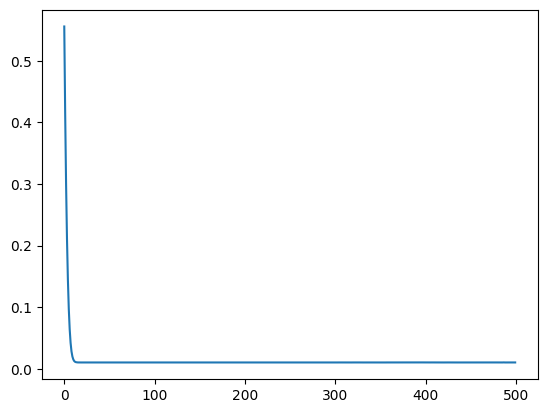

In [49]:
plt.plot(Loss)
plt.show()